<h1>Exploratory Data Analysis</h1>
<p>What are the characteristics that have the most impact on the car price?</p>

<h2>Descriptive statistics</h2>
Find relationship between variables.

In [1]:
import pandas as pd
import seaborn as sns
from  matplotlib import pyplot as plt
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.describe() # Summarize statistics
categories = df["drive-wheels"].value_counts() # Summarize by category

<h4>Box Plots<h4>

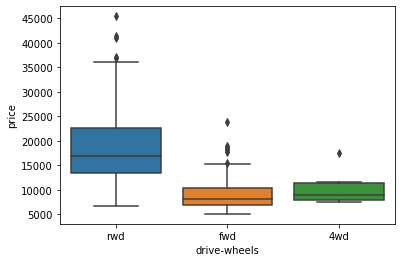

In [2]:
box_plot = sns.boxplot(x="drive-wheels", y="price", data=df)

<h4>Scatter Plot</h4>
Show relationship between two variables. </br>
There is a target variable (y axis) and a predictor variable (x axis).

Text(0, 0.5, 'Price')

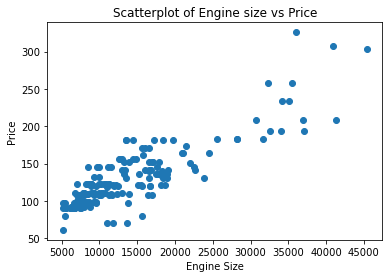

In [3]:
x = df["price"]
y = df["engine-size"]
plt.scatter(x,y)
plt.title('Scatterplot of Engine size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
# From the plot we can see that there is a positive linear relationship

<h2>Grouping Data</h2>
Group categorical variables, and look which category influence more the target variable

In [38]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
# Use pivot to visualize data better
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')

Another way is to use heat map

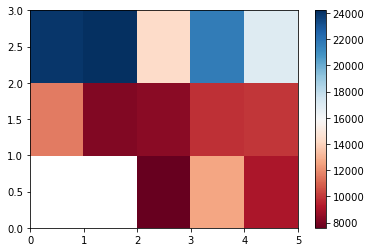

In [49]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<h2>Correlation</h2>
It measures variables interdependency.</br>
Correlation doesn't imply causation.

(0.0, 47414.1)

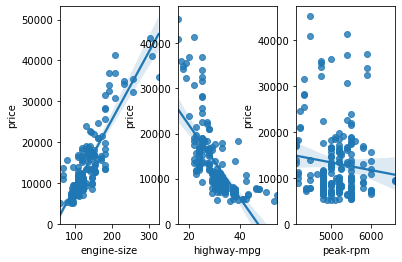

In [37]:
# Positive linear relationship
plt.subplot(1, 3, 1)
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
# Negative linear relationship
plt.subplot(1, 3, 2)
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
# weak correlation, we can't use rpm to predict the value of price
plt.subplot(1, 3, 3)
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<h3>Correlation statistics methods</h3>
<h4>Pearson</h4>
variables: correlation coefficient (how much correlation) and p-value (presition)

In [26]:
from scipy import stats
# Pearson correlation
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])
pearson_coef, p_value

(0.5846418222655083, 8.076488270732873e-20)

<h4>ANOVA</h4>
Analisys of variance. </br>
Relationship between categorical variables</br>
variables: f-test score: means variation (in sample group) and sample group variantion ratio. p-value: precition

In [32]:
grouped_test2=df_grp[['drive-wheels', 'price']].groupby(['drive-wheels'])
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
f_val, p_val

(17.54495590883977, 0.0005365411925421271)